# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos aplicar e comparar tecnicas dos modelos de RandomForest e Regressão Logística. Além disso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo dados demográficos (idade, renda, etc.) e informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analise e limpeza dos dados para garantir que estejam prontos para a modelagem.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
base = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [ ]:
base.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

Note que há dados faltantes na coluna Income. Vamos preenchê-los com a média de salários.
Além disso, as variáveis Education e Marital Status são categóricas

In [ ]:
#Preenchendo os dados faltantes
base['Income'].fillna(base['Income'].median(), inplace=True)

<ipython-input-105-4cf855fd1438>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Income'].fillna(base['Income'].median(), inplace=True)


In [ ]:
base['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

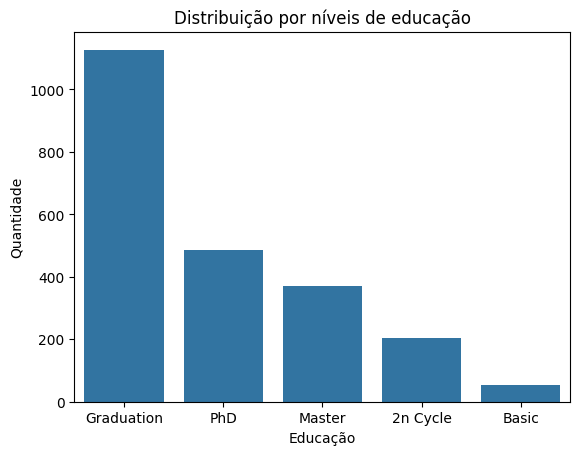

In [ ]:
#Gráfico de distribuição dos níveis de educação
count_education = base['Education'].value_counts()
sns.barplot(x=count_education.index, y=count_education.values)
plt.title('Distribuição por níveis de educação')
plt.xlabel('Educação')
plt.ylabel('Quantidade')
plt.show()

A grande maioria das pessoas da base de dados possui algum nível de formação superior.

In [ ]:
base['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

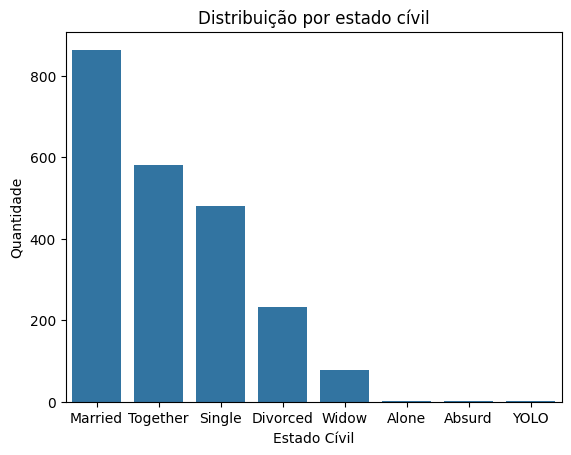

In [ ]:
#Gráfico da distribuição de clientes por estado civil
count_status = base['Marital_Status'].value_counts()
sns.barplot(x=count_status.index, y=count_status.values)
plt.title('Distribuição por estado cívil')
plt.xlabel('Estado Cívil')
plt.ylabel('Quantidade')
plt.show()

Entedemos que há dados além dos convencionais e que eles representam uma parcela muito pequena dos dados, por isso decidimos removê-los.

In [ ]:
#Remoção de algumas classes do estado civil
marital_remover = ['Absurd', 'Alone', 'YOLO']
base = base[~base['Marital_Status'].isin(marital_remover)]
base['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [ ]:
base.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25037.955891,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68289.750000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


Começamos percebendo a possível presença de outliers, principalmente nas variáveis Income, MntWines e MntMeatProducts. No entanto, vamos fazer uma análise mais aprofundada.

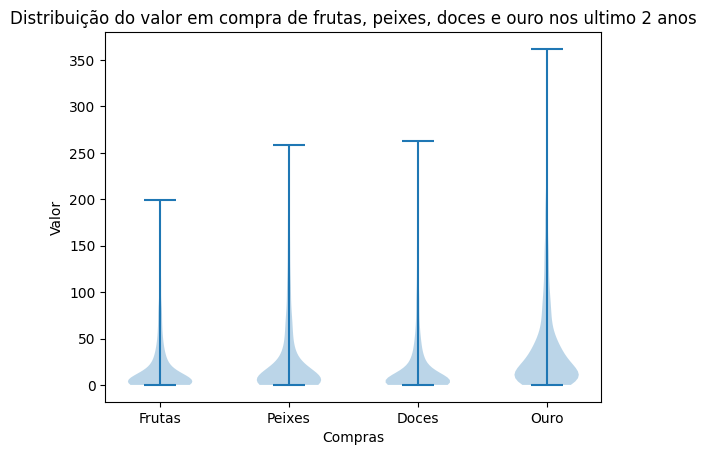

In [ ]:
#Gráfico para visualização do valor gasto em frutas, peixes, doces e ouro.
plt.violinplot(base[['MntFruits','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.title('Distribuição do valor em compra de frutas, peixes, doces e ouro nos ultimo 2 anos')
plt.xlabel('Compras')
plt.ylabel('Valor')
plt.xticks([1, 2, 3, 4], ['Frutas', 'Peixes', 'Doces', 'Ouro'])
plt.show()

Para todos esses produtos, a concentração está em inferior a 50 e com uma amplitude muito grande, o que indica a presença de outliers.

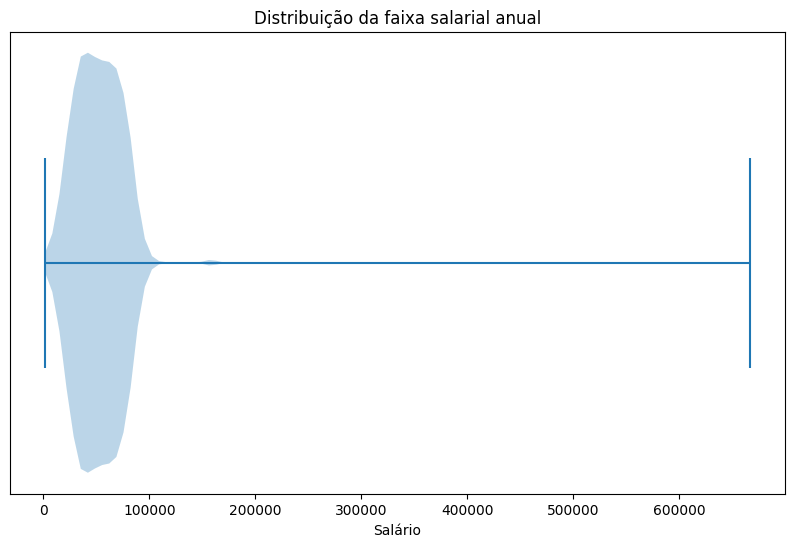

In [ ]:
#Visualização da distribuição salarial
plt.figure(figsize=(10, 6))
plt.violinplot(base['Income'], orientation = 'horizontal')
plt.title('Distribuição da faixa salarial anual')
plt.xlabel('Salário')
plt.ylabel('')
plt.yticks([])
plt.show()

Note uma amplitude maior do que 600000 e a grande concentração de dados até 100000. Temos outro indicativo de outliers.

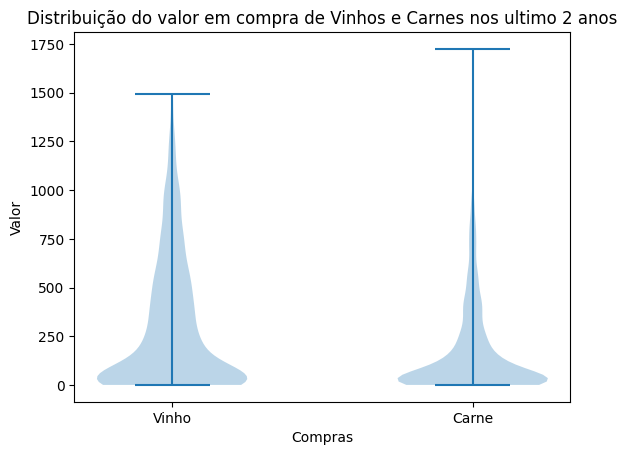

In [ ]:
#Visualização da distribuição de valores gastos em Vinhos e Carnes
plt.violinplot(base[['MntWines', 'MntMeatProducts']])
plt.title('Distribuição do valor em compra de Vinhos e Carnes nos ultimo 2 anos')
plt.xlabel('Compras')
plt.ylabel('Valor')
plt.xticks([1, 2], ['Vinho', 'Carne'])
plt.show()

Mais uma vez, uma amplitude muito grande e a concentração de dados em um dos extremos.
Deste modo, optamos por aplicar o Método IQR para remoção de outliers nas variáveis Income, Vinhos e Carnes. Além disso, optamos por manter os dados em frutas, peixes, doces e ouro pois parecem valores mais reais.

In [ ]:
#Metodo IQR para salário anual
Q1 = base['Income'].quantile(0.25)
Q3 = base['Income'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
base = base[(base['Income'] >= limite_inferior) & (base['Income'] <= limite_superior)]

In [ ]:
#Metodo IQR para os vinhos
Q1 = base['MntWines'].quantile(0.25)
Q3 = base['MntWines'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
base = base[(base['MntWines'] >= limite_inferior) & (base['MntWines'] <= limite_superior)]

In [ ]:
#Metodo IQR para as carnes
Q1 = base['MntMeatProducts'].quantile(0.25)
Q3 = base['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
base = base[(base['MntMeatProducts'] >= limite_inferior) & (base['MntMeatProducts'] <= limite_superior)]

In [ ]:
base.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.00000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1968.801301,48508.349600,0.492993,49.079580,255.081582,21.996496,108.402903,31.493994,22.62012,40.910410,5.548048,5.621622,0.010010,0.470470
std,11.678984,19146.800532,0.546029,28.898579,295.946247,35.851185,129.901320,49.549515,37.13424,50.111488,3.197778,2.308022,0.099573,0.499252
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.250000,33962.750000,0.000000,24.000000,19.000000,1.000000,14.000000,2.000000,1.00000,8.000000,3.000000,4.000000,0.000000,0.000000
50%,1970.000000,48182.000000,0.000000,49.000000,130.000000,6.000000,50.000000,10.000000,7.00000,21.000000,4.000000,6.000000,0.000000,0.000000
75%,1977.000000,63371.250000,1.000000,74.000000,410.750000,25.000000,156.000000,36.000000,26.00000,51.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,113734.000000,2.000000,99.000000,1224.000000,199.000000,522.000000,259.000000,263.00000,362.000000,13.000000,20.000000,1.000000,1.000000


Notamos uma melhora significativa, principalmente sobre a variável salário.

Vamos agora entender como esses dados podem estar relacionados.

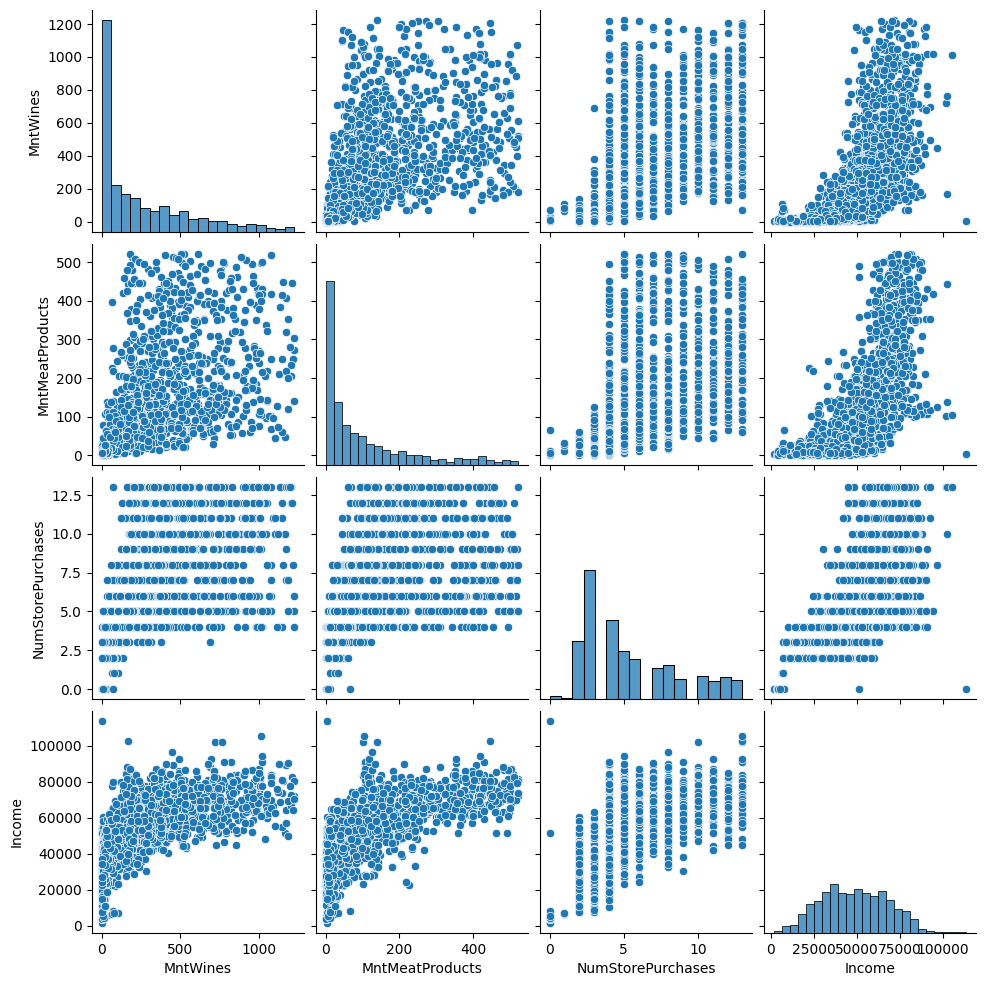

In [ ]:
#Visualização da correlação entre as variáveis Vinhos, Carnes, Compras presenciais e salário
sns.pairplot(base[['MntWines', 'MntMeatProducts', 'NumStorePurchases', 'Income']])
plt.show()

Notamos que o salário se relaciona bem com a compra de vinhos, carnes e compras presenciais. Podemos dizer que quanto maior o salário, maior a tendência da pessoa fazer essas compras.

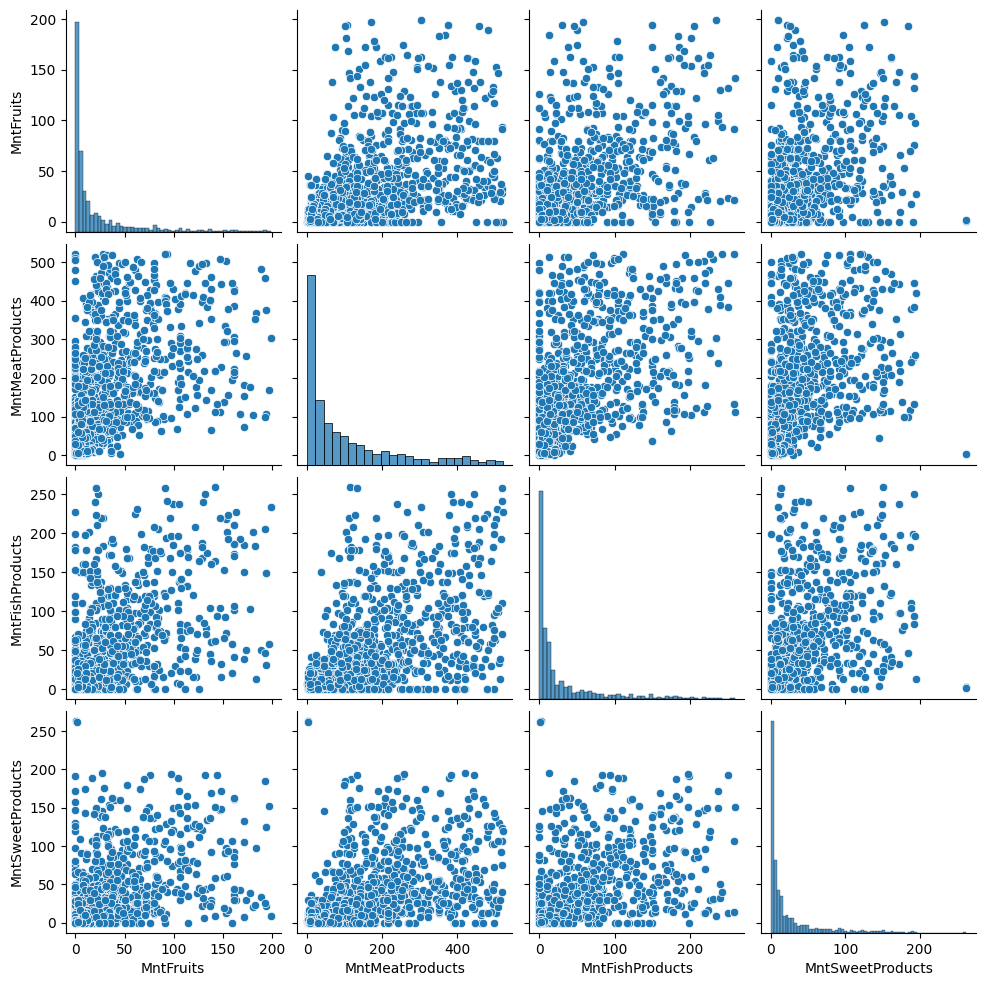

In [ ]:
sns.pairplot(base[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']])
plt.show()

Apesar de ter um scatterplot bem distribuido, há uma relação positiva entre as variáveis, dizendo que os clientes os compram em conjunto.

Text(0, 0.5, 'Quantidade')

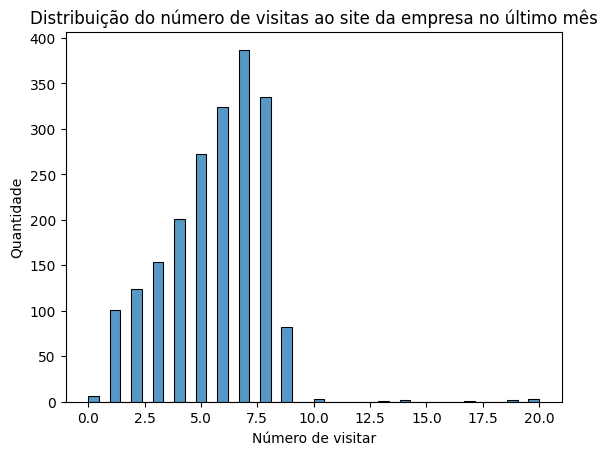

In [ ]:
#Grafico do número de visitas ao site
sns.histplot(x=base['NumWebVisitsMonth'])
plt.title('Distribuição do número de visitas ao site da empresa no último mês')
plt.xlabel('Número de visitar')
plt.ylabel('Quantidade')

Quase 400 pessoas visitaram o site exatamente 7 vezes no último mês. Além disso, a grande maioria visitou o site até 9 vezes no mesmo período. Com isso, Vamos reduzir as próxima análise para até 10 visitas do último mês.

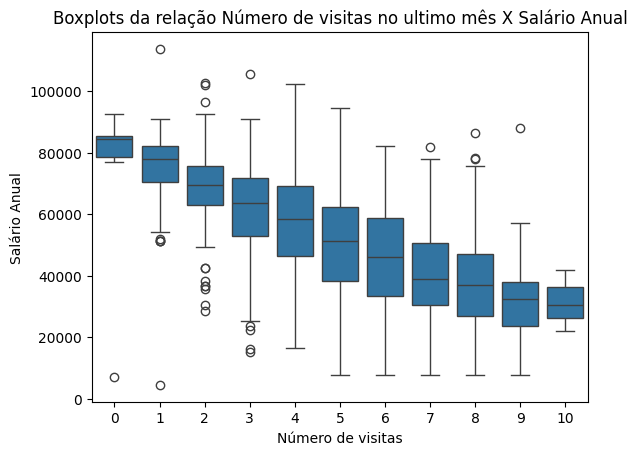

In [ ]:
#Grafico da relação entre numeros de visitas ao site e o salário anual
webvisit_selected = base[base['NumWebVisitsMonth'] <= 10]
sns.boxplot(x = 'NumWebVisitsMonth', y = 'Income', data = webvisit_selected)
plt.title('Boxplots da relação Número de visitas no ultimo mês X Salário Anual')
plt.xlabel('Número de visitas')
plt.ylabel('Salário Anual')
plt.show()

Note que quanto mais visitas ao site, menor a faixa salarial das pessoas.

Text(0, 0.5, 'Quantidade')

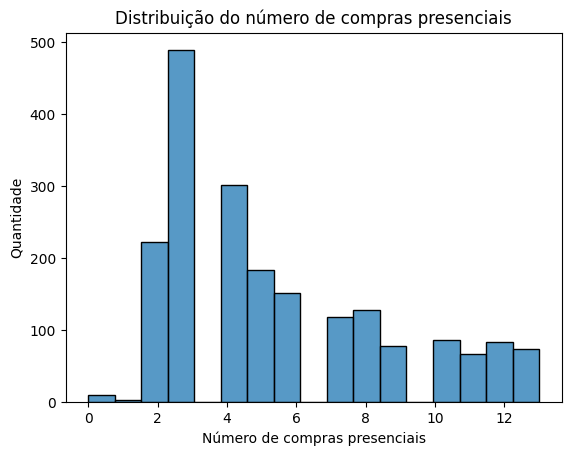

In [ ]:
#Gráfico para distribuição do número de compras presencias
sns.histplot(x=base['NumStorePurchases'])
plt.title('Distribuição do número de compras presenciais')
plt.xlabel('Número de compras presenciais')
plt.ylabel('Quantidade')

Entendemos que há quantidades significativas de compras presenciais em todos os números de visitas.

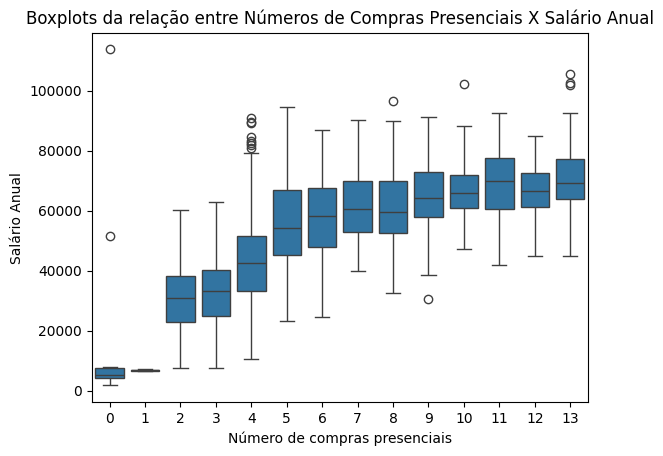

In [ ]:
#Gráfico para visualizar a relação entre salário e compras presenciais.
sns.boxplot(x = 'NumStorePurchases', y = 'Income', data = base)
plt.title('Boxplots da relação entre Números de Compras Presenciais X Salário Anual')
plt.xlabel('Número de compras presenciais')
plt.ylabel('Salário Anual')
plt.show()

Observamos uma tendencia e mais compras presenciais para salários maiores.

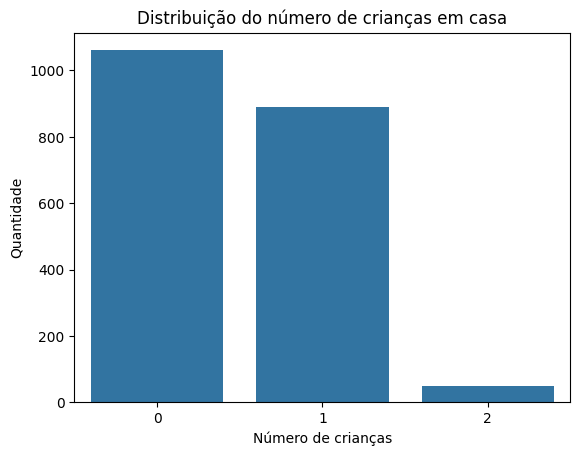

In [ ]:
#Visualização do número de crianças em casa
sns.countplot(x='Kidhome', data=base)
plt.title('Distribuição do número de crianças em casa')
plt.xlabel('Número de crianças')
plt.ylabel('Quantidade')
plt.show()

Mais da metade dos clientes não possuem filhos, aqueles possuem, possuem apenas um (na maioria).

Text(0, 0.5, 'Salário Anual')

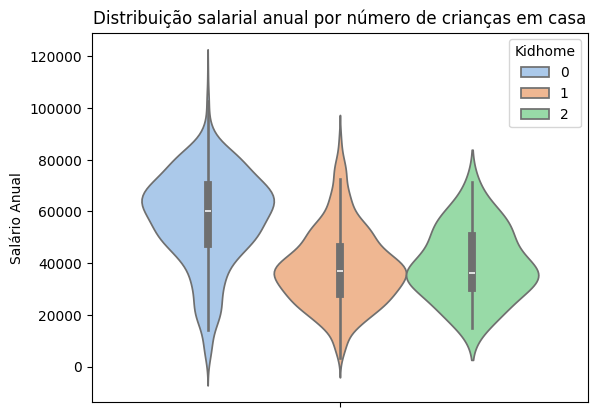

In [ ]:
#Visualização de concentração de renda por número de filhos
sns.violinplot(hue='Kidhome', y='Income', data=base, palette='pastel')
plt.title('Distribuição salarial anual por número de crianças em casa')
plt.ylabel('Salário Anual')

Percebemos que as pessoas sem filhos detem as maiores faixas salariais, com uma mediana de 60000 anual, em contrapartirda de 40000 à aqueles com filhos.

# ETAPA 2:
**Pré-processamento**

**Codificação de Variáveis Categóricas:** Transformação de variáveis categóricas em interpretáveis por modelos de Machine Learning.

**Análise de Correlação:** Verificação da correlação entre as váriaveis e a possibilidade de retirar váriaveis.

**Realização da padronização dos dados**: Padronizção dos dados para garantir eficiência no modelo e eficácia.








In [ ]:
#Codificação da variável categórica Education
education_map = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
base['Education'] = base['Education'].map(education_map)

Aplicamos a função .map com um dicionário pois gostariamos de garantir a ordem nos niveis de educação.

In [ ]:
#Codificação da variável categórica Marital Status
base_marital_encoded = pd.get_dummies(
    base,
    columns=['Marital_Status'],
    prefix='Marital_Status',
    drop_first=True) #Remoção da coluna original
colunas_one_hot = [col for col in base_marital_encoded.columns if col.startswith('Marital_Status_')]
for col in colunas_one_hot:
    base_marital_encoded[col] = base_marital_encoded[col].astype(int) #convertendo saidas em 0 ou 1, no lugar de True/False

base_marital_encoded = base_marital_encoded.drop(columns=['Marital_Status_Widow']) #Remoção da ultima coluna para evitar multicolinearidade
base_marital_encoded.head()

,Year_Birth,Education,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
1,1954,2,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,0,1,0
2,1965,2,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,0,0,1
3,1984,2,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,0,0,1
4,1981,4,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,1,0,0
5,1967,3,62513.0,0,16,520,42,98,0,42,14,10,6,0,1,0,0,1


Aplicamos a função get_dummies para transformar em variáveis binárias as classes de estado civil, a fim de não sobrepor nenhuma em importância.

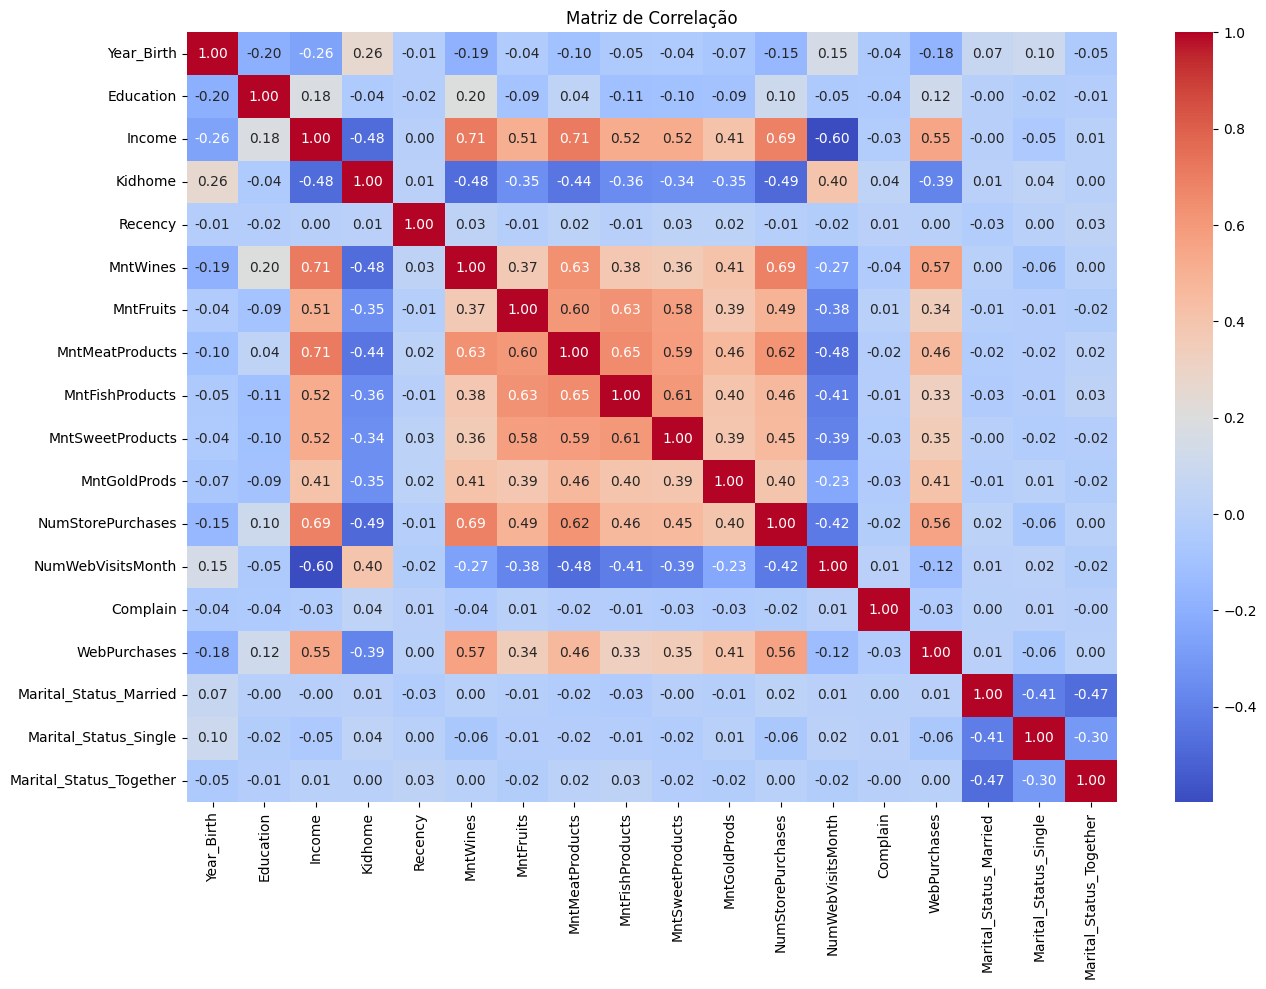

In [ ]:
#Visualização da matriz de correlação
matriz_corr = base_marital_encoded.corr()
plt.figure(figsize=(15,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Apesar de dedicarmos certo esforço em algumas variáveis, percebemos que elas apresenta uma correlação muito baixa. Em contrapartida, há variáveis com correlações muito expressivas. Por conta disso, optamos por remover as variáveis de ano de nascimento, educação, visita recente, reclamação e estado civil.

In [ ]:
#Remocão de variáveis
base_reduzida = base_marital_encoded.drop(columns=[
    'Year_Birth',
    'Education',
    'Recency',
    'Complain',
    'Marital_Status_Married',
    'Marital_Status_Single',
    'Marital_Status_Together'
    ])
base_reduzida.head()


,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,WebPurchases
1,46344.0,1,11,1,6,2,1,6,2,5,0
2,71613.0,0,426,49,127,111,21,42,10,4,1
3,26646.0,1,11,4,20,10,3,5,4,6,0
4,58293.0,1,173,43,118,46,27,15,6,5,1
5,62513.0,0,520,42,98,0,42,14,10,6,1


In [ ]:
#Padronização dos dados para aplicação dos modelos.
scaler = StandardScaler()
base_scaled = scaler.fit_transform(base_reduzida)
base_scaled = pd.DataFrame(base_scaled, columns=base_reduzida.columns, index=base_reduzida.index)
base_scaled.head()

,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,WebPurchases
1,-0.113068,0.928767,-0.824956,-0.585804,-0.788510,-0.595392,-0.582361,-0.696829,-1.109813,-0.269398,-0.942586
2,1.207013,-0.903095,0.577677,0.753399,0.143199,1.604979,-0.043640,0.021749,1.392550,-0.702778,1.060911
3,-1.142114,0.928767,-0.824956,-0.502103,-0.680709,-0.433897,-0.528489,-0.716790,-0.484222,0.163982,-0.942586
4,0.511161,0.928767,-0.277422,0.585999,0.073898,0.292831,0.117977,-0.517185,0.141369,-0.269398,1.060911
5,0.731619,-0.903095,0.895381,0.558099,-0.080103,-0.635766,0.522018,-0.537145,1.392550,0.163982,1.060911


In [ ]:
#Separação das bases
x = base_scaled.drop(columns=['WebPurchases'])
y = base['WebPurchases']

In [ ]:
x

,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth
1,-0.113068,0.928767,-0.824956,-0.585804,-0.788510,-0.595392,-0.582361,-0.696829,-1.109813,-0.269398
2,1.207013,-0.903095,0.577677,0.753399,0.143199,1.604979,-0.043640,0.021749,1.392550,-0.702778
3,-1.142114,0.928767,-0.824956,-0.502103,-0.680709,-0.433897,-0.528489,-0.716790,-0.484222,0.163982
4,0.511161,0.928767,-0.277422,0.585999,0.073898,0.292831,0.117977,-0.517185,0.141369,-0.269398
5,0.731619,-0.903095,0.895381,0.558099,-0.080103,-0.635766,0.522018,-0.537145,1.392550,0.163982
...,...,...,...,...,...,...,...,...,...,...
2235,0.664228,-0.903095,1.534171,0.585999,0.566703,0.212084,2.569159,4.113651,-0.484222,-0.269398
2236,0.810033,2.760628,0.510080,-0.613704,-0.603708,-0.635766,-0.609297,-0.656908,-0.171427,0.597362
2237,0.442621,-0.903095,2.206758,0.725499,0.836206,0.010215,-0.286064,-0.337540,2.330937,0.163982
2238,1.083306,-0.903095,0.584436,0.223298,0.813106,0.979185,0.198785,0.400998,1.392550,-1.136158


In [ ]:
y

,WebPurchases
1,0
2,1
3,0
4,1
5,1
...,...
2235,1
2236,1
2237,0
2238,1


In [ ]:
#bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ETAPA 3:

**Modelagem**

Escolhemos 2 técnicas de machine learning afim de identificar qual tem o melhor resultado para essa base. Considerando que estamos lidando com uma classificação binária, escolhemos o RandomForest e a Regressão Logistica.

In [ ]:
#RandomForest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

Não utilizamos os dados balanceados para este modelo pois o RandomForest performa melhor em dados desbalanceados.

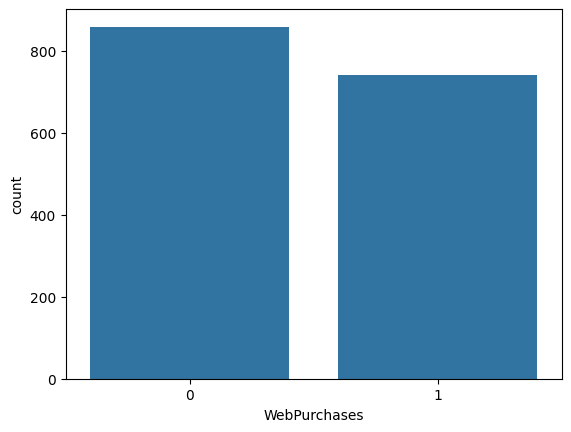

In [ ]:
#Verificação da variável target para balanceamento
sns.countplot(x=y_train)
plt.show()

In [ ]:
#Balanceamento dos dados para o modelo de regressao logistica
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_balanceado, y_train_balanceado = smote.fit_resample(x_train, y_train)

In [ ]:
#Regressao logistica
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(x_train_balanceado, y_train_balanceado)
y_pred_lr = logistic_regression.predict(x_test)

# ETAPA 4:

**Avaliação dos modelos:** Avaliação dos resultados encontrados nos dois modelos.

In [ ]:
#Metricas do RandomForest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       200
           1       0.90      0.94      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Nosso modelo de RandomForest teve ótimos resultados em todas as classes. Ele foi capaz de prever mais 90% da tendencia de compras online com base nos dados fornecidos.
Acreditamos que o uso de hiperparâmetros poderiam ate causar um overfitting.

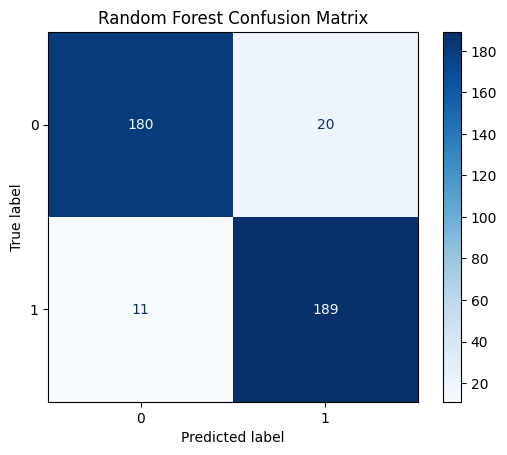

In [ ]:
#Matriz confusão do RandomForest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

Note que apenas 11 pessoas não foram identificadas dentre as 200 que realmente comprariam online.

In [ ]:
#Métricas da regressão logistica
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       200
           1       0.87      0.82      0.84       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Apesar de não ter um desempenho tão excelente quanto a RandomForest, o modelo de Regressão Logistica ainda teve ótimos resultados. Foi capaz de acertar 85% em média de suas previsões. Das vezes que ele disse que um cliente compraria online, ele chegou a acertar 87%.
Além disso, nosso modelo não teve nenhum hiperparâmetro incluso, o que reforça a ideia de seu bom desempenho.

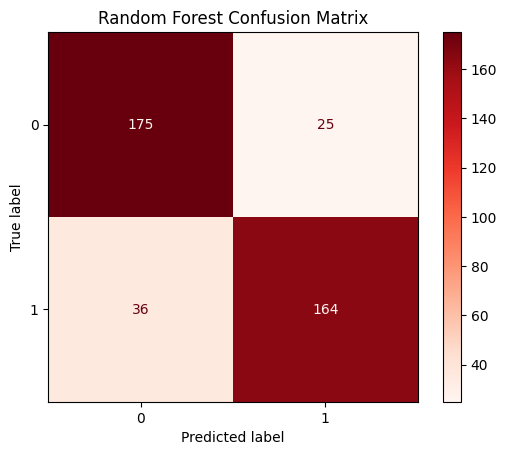

In [ ]:
#Matriz confusão da regressão logistica
cm_rf = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=logistic_regression.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title('Random Forest Confusion Matrix')
plt.show()

O modelo encontrou 164 pessoas dentre que as 200 que comprariam online.

In [ ]:
#Cross Validation
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=42)
cv_rf = cross_val_score(random_forest, x, y, cv=crossvalidation)
cv_lr = cross_val_score(logistic_regression, x, y, cv=crossvalidation)

In [ ]:
print(f'Acurácia média Random Forest: {cv_rf.mean()}')
print(f'Acurácia média Logistic Regression: {cv_lr.mean()}')

Acurácia média Random Forest: 0.9259321608040201
Acurácia média Logistic Regression: 0.8553467336683417


Utilizamos o crossvalidation com 10 folds para avaliar a capacidade dos nossos modelos em dados diferentes e ainda assim eles tiveram o desempenho muito similar, o que nos permite dizer que esses modelos são robustos.